### Exercice 3.1 : Classification de Sentiment avec Augmentation du Nombre de Neurones
**Objectif** : Créer un modèle simple de classification de texte pour classer les critiques de films en positives ou négatives. Commencez avec un petit nombre de neurones et augmentez progressivement ce nombre pour observer les effets sur la performance.

**Données** : Utilisez un sous-ensemble du jeu de données de critiques de films IMDB.

**Étapes** :
  1. Commencez par une couche `Embedding`, suivie d'une couche `Dense` avec 16 neurones.
  2. Entraînez le modèle et enregistrez la précision.
  3. Augmentez progressivement le nombre de neurones dans la couche `Dense` (par exemple, de 16 à 64 puis à 128) et observez comment la précision et le temps d'entraînement sont affectés.
  4. Tracez les résultats pour la précision et la perte, y compris pour les tests de validation.

Complétez le code ci-dessous.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import time
import os
import librosa
import seaborn as sns

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb, cifar10, fashion_mnist
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Embedding, LSTM, GlobalAveragePooling2D, Reshape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

2024-11-18 18:46:07.702568: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 18:46:07.714143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731951967.728001   91200 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731951967.732415   91200 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 18:46:07.747544: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# ===================== CONFIG =====================
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Réduire les logs TensorFlow

# GPU Configuration 
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Load and preprocess the data
vocab_size = 10000  # Only consider the top 10k words
max_length = 256    # Pad/truncate all reviews to be 256 words

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [4]:
def build_model(dense_neurons):
    model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dropout(0.5),
        Dense(dense_neurons, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
neuron_counts = [16, 64, 128]  # Different sizes for the Dense layer
results = {}

for neurons in neuron_counts:
    print(f"\nTraining model with {neurons} neurons in the Dense layer")
    model = build_model(dense_neurons=neurons)

    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=512,
        validation_split=0.2,
        verbose=2
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
    results[neurons] = {'accuracy': accuracy, 'loss': loss, 'history': history}


Training model with 16 neurons in the Dense layer
Epoch 1/20


/home/rodologie/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1731951972.001458   91200 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9502 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1731951973.953562   91329 cuda_dnn.cc:529] Loaded cuDNN version 90300


40/40 - 4s - 100ms/step - accuracy: 0.6355 - loss: 0.6411 - val_accuracy: 0.7694 - val_loss: 0.5039
Epoch 2/20
40/40 - 1s - 34ms/step - accuracy: 0.8442 - loss: 0.4064 - val_accuracy: 0.8644 - val_loss: 0.3343
Epoch 3/20
40/40 - 1s - 34ms/step - accuracy: 0.9028 - loss: 0.2921 - val_accuracy: 0.8686 - val_loss: 0.3409
Epoch 4/20
40/40 - 1s - 34ms/step - accuracy: 0.9243 - loss: 0.2398 - val_accuracy: 0.8806 - val_loss: 0.3291
Epoch 5/20
40/40 - 1s - 34ms/step - accuracy: 0.9498 - loss: 0.1724 - val_accuracy: 0.8658 - val_loss: 0.3600
Epoch 6/20
40/40 - 1s - 34ms/step - accuracy: 0.9578 - loss: 0.1478 - val_accuracy: 0.8714 - val_loss: 0.3700
Epoch 7/20
40/40 - -1s - -14010us/step - accuracy: 0.9686 - loss: 0.1172 - val_accuracy: 0.8636 - val_loss: 0.4705
Epoch 8/20
40/40 - 1s - 32ms/step - accuracy: 0.9793 - loss: 0.0844 - val_accuracy: 0.8256 - val_loss: 0.5106
Epoch 9/20
40/40 - 1s - 33ms/step - accuracy: 0.9299 - loss: 0.1966 - val_accuracy: 0.8614 - val_loss: 0.4170
Epoch 10/20
40/

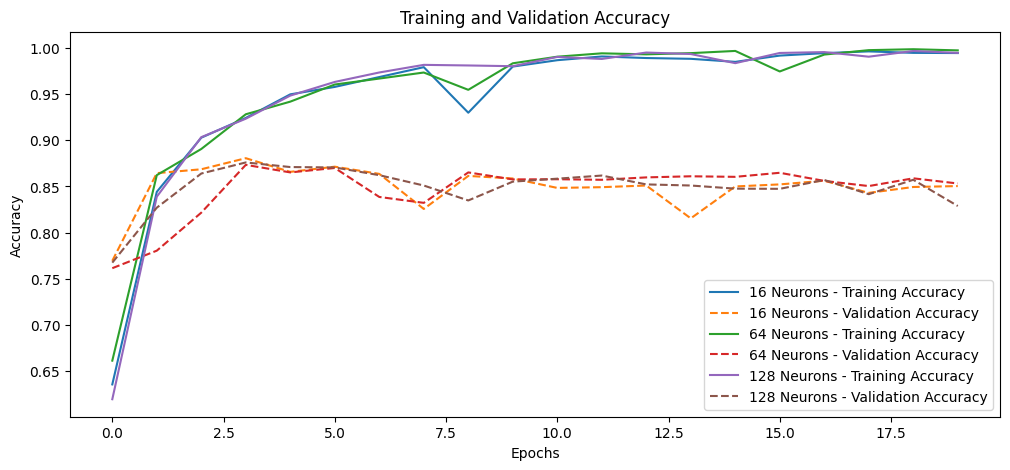

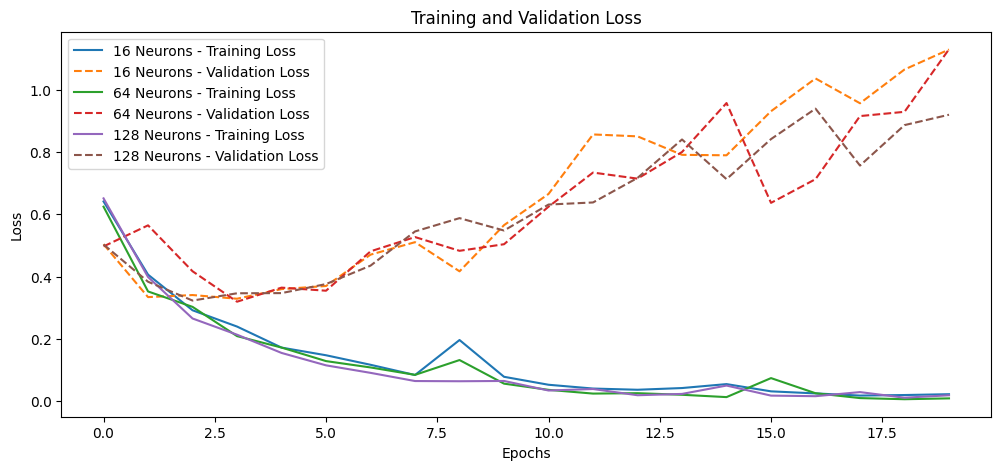

In [6]:
#courbes pour la précision
plt.figure(figsize=(12, 5))
for neurons, result in results.items():
    history = result['history'].history  
    plt.plot(history['accuracy'], label=f'{neurons} Neurons - Training Accuracy')
    plt.plot(history['val_accuracy'], linestyle='--',
             label=f'{neurons} Neurons - Validation Accuracy')

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# courbes pour la perte
plt.figure(figsize=(12, 5))
for neurons, result in results.items():
    history = result['history'].history  
    plt.plot(history['loss'], label=f'{neurons} Neurons - Training Loss')
    plt.plot(history['val_loss'], linestyle='--',
             label=f'{neurons} Neurons - Validation Loss')

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Exercice 3.2 : Classification d'Images Fine-grained avec Augmentation du Nombre de Neurones
**Objectif** : Créer un modèle de classification d'images de base pour classer des images de fleurs (`oxford_flowers102` - le *Oxford 102 Flower Dataset*). Commencez avec un petit nombre de neurones et augmentez-les progressivement pour observer les effets sur la performance.

**Données** : Utilisez le *Oxford 102 Flower Dataset*, qui contient des images de 102 catégories de fleurs.

**Étapes** :
  1. Commencez avec des couches `Conv2D` et `MaxPooling2D` pour l'extraction des caractéristiques des images.
  2. Ajoutez une couche `Flatten` pour convertir les cartes de caractéristiques 2D en un vecteur 1D.
  3. Ajoutez une couche `Dense` avec un petit nombre de neurones (par exemple, 32), suivie d'une couche de sortie.
  4. Entraînez le modèle et enregistrez la précision.
  5. Augmentez progressivement le nombre de neurones dans la couche `Dense` (par exemple, de 32 à 128 puis à 256) pour observer les changements dans la précision et le temps d'entraînement.

Complétez le code ci-dessous.

In [7]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

train_dataset = dataset['train']
test_dataset = dataset['test']

In [8]:
image_size = (224, 224)  
batch_size = 32

def preprocess_image(image, label):
    """Normalisation des images"""
    image = tf.image.resize(image, image_size)
    image = image / 255.0  
    return image, label

train_dataset = train_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Geler les couches de base pour l'entraînement initial

In [10]:
def create_model(num_neurons, base_model):
    model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout pour éviter l'overfitting
    Dense(102, activation='softmax')  # 102 classes de fleurs
])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [11]:
neurons_list = [32, 128, 256]
results = {}
for neurons in neurons_list:
    print(f"Training model with {neurons} neurons in the Dense layer")
    model = create_model(neurons, base_model)
    history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)
    accuracy, loss = model.evaluate(train_dataset, verbose=2)
    results[neurons] = {'accuracy': accuracy, 'loss': loss, 'history': history}

Training model with 32 neurons in the Dense layer
Epoch 1/10


2024-11-18 18:48:00.288097: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1731952080.363099   91331 service.cc:148] XLA service 0x7f9d11e21360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731952080.363151   91331 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-11-18 18:48:00.410638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-18 18:48:01.249033: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4365_0', 112 bytes spill stores, 144 bytes spill loads

2024-11-18 18:48:01.452156: I external/local_xla/xla/stream_executor/cuda/cuda_asm_

15/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0062 - loss: 4.9586 

I0000 00:00:1731952085.043542   91331 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0161 - loss: 4.8486

2024-11-18 18:48:06.002759: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4365', 16 bytes spill stores, 16 bytes spill loads

2024-11-18 18:48:06.103194: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4365_0', 344 bytes spill stores, 520 bytes spill loads

2024-11-18 18:48:06.202266: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6708', 28 bytes spill stores, 28 bytes spill loads

2024-11-18 18:48:06.258297: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6692', 32 bytes spill stores, 32 bytes spill loads

2024-11-18 18:48:06.371854: I external/local_xla/xla/str

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.0190 - loss: 4.8204 - val_accuracy: 0.1493 - val_loss: 4.1273
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.1896 - loss: 3.7038 - val_accuracy: 0.3799 - val_loss: 3.1177
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3756 - loss: 2.6788 - val_accuracy: 0.5365 - val_loss: 2.3263
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5383 - loss: 1.8973 - val_accuracy: 0.6260 - val_loss: 1.8577
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6623 - loss: 1.4071 - val_accuracy: 0.6738 - val_loss: 1.5484
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7463 - loss: 1.0100 - val_accuracy: 0.7014 - val_loss: 1.3681
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8165 - loss: 0.7908 - val_accuracy: 0.7149 - val_loss: 1.2355
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8246 - loss: 0.6904 - val_accuracy: 0.7154 - val_loss: 1

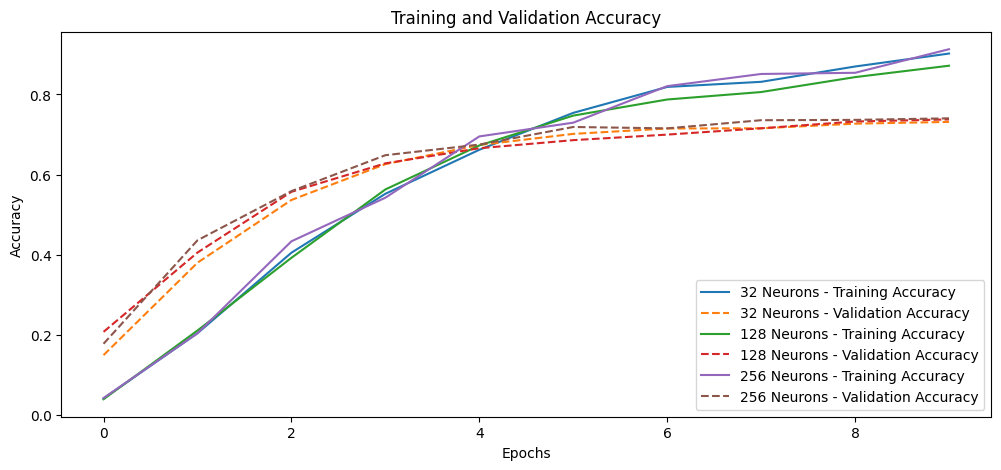

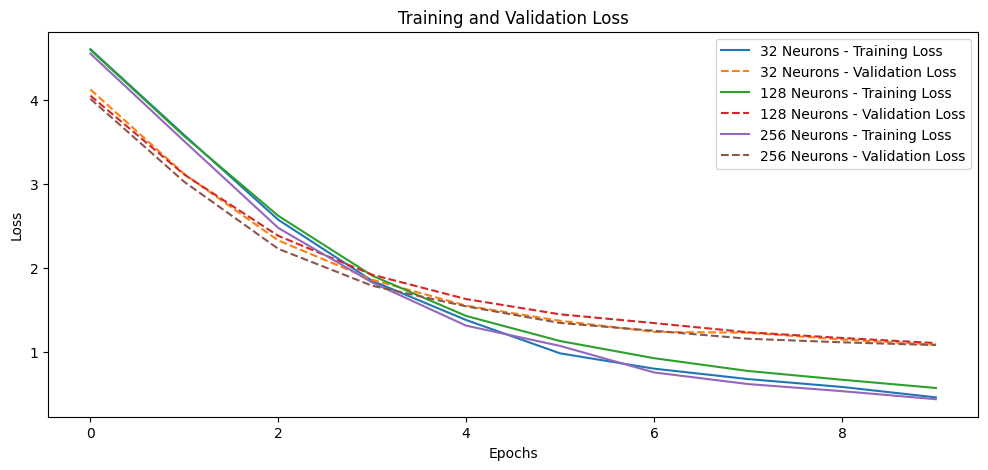

In [12]:
#courbes pour la précision
plt.figure(figsize=(12, 5))

for neurons, result in results.items():
    history = result['history'].history  
    plt.plot(history['accuracy'], label=f'{neurons} Neurons - Training Accuracy')
    plt.plot(history['val_accuracy'], linestyle='--',
            label=f'{neurons} Neurons - Validation Accuracy')

    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
plt.show()


# courbes pour la perte
plt.figure(figsize=(12, 5))

for neurons, result in results.items():
    history = result['history'].history  
    plt.plot(history['loss'], label=f'{neurons} Neurons - Training Loss')
    plt.plot(history['val_loss'], linestyle='--',
            label=f'{neurons} Neurons - Validation Loss')

    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
plt.show()

On remarque que dans ce cas ci, le nombre de neuronnes importe **peu**

### Exercice 3.3 : **Étudier l'Influence de la Taille des Lots sur la Performance du Modèle**

**Objectif** : Cet exercice démontre comment différentes tailles de lots affectent la performance d'un modèle de réseau neuronal, y compris sa vitesse d'entraînement, sa perte, sa précision et sa capacité de généralisation.

**Jeu de données** : **Fashion MNIST** — un jeu de données contenant des images en niveaux de gris de 10 types de vêtements différents, avec 60 000 images d'entraînement et 10 000 images de test.

---

### Étapes :

#### 1. **Charger le Jeu de Données**
   - Utilisez `tensorflow.keras.datasets.fashion_mnist` pour charger le jeu de données.
   - Prétraitez les données en normalisant les valeurs des pixels dans l'intervalle `[0, 1]`.

In [13]:
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to (28, 28, 1) to match the input shape expected by CNNs
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [14]:
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [15]:
#Normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
print(f"Min value of train_images: {train_images.min()}, Max value of train_images: {train_images.max()}")
print(f"Min value of test_images: {test_images.min()}, Max value of test_images: {test_images.max()}")

Min value of train_images: 0.0, Max value of train_images: 0.00392156862745098
Min value of test_images: 0.0, Max value of test_images: 0.00392156862745098


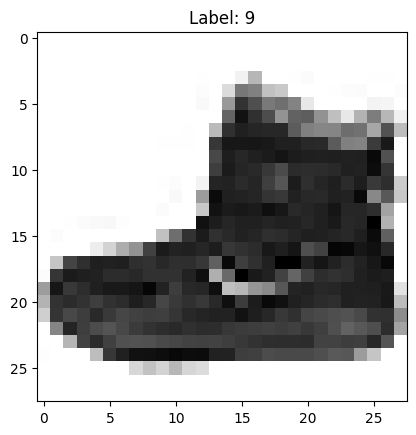

In [17]:
plt.imshow(train_images[0], cmap=plt.cm.binary)   
plt.title(f"Label: {train_labels[0]}")  
plt.show()

#### 2. **Définir l'Architecture du Modèle**
   - Construisez un modèle simple de réseau neuronal convolutionnel (CNN) ou de réseau neuronal complètement connecté (FCNN).
   - Le modèle doit inclure :
     - Une couche d'entrée (pour gérer les images 28x28).
     - Une ou plusieurs couches cachées (par exemple, Dense, Conv2D).
     - Une couche de sortie avec 10 unités (une pour chaque catégorie de vêtement).
   - Utilisez **l'activation softmax** pour la couche de sortie, car il s'agit d'un problème de classification multiclasse.

In [18]:
def create_model():
    model = Sequential([
        Reshape((28, 28, 1), input_shape=(28, 28)),  
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

/home/rodologie/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#### 3. **Varier la Taille des Lots**
   - Expérimentez avec différentes tailles de lots (par exemple, 16, 32, 64, 128, 256).
   - Pour chaque taille de lot :
     - Entraînez le modèle pendant un nombre fixe d'époques (par exemple, 10 époques).
     - Enregistrez la perte d'entraînement, la perte de validation et la précision.

In [19]:
def train_model_with_batch_size(batch_size):
    model = create_model()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=2)
    return history

In [20]:
batch_sizes = [16, 32, 64, 128, 256]
results = {}

for batch_size in batch_sizes:
    print(f"Entraînement avec la taille de lot : {batch_size}")
    history = train_model_with_batch_size(batch_size)
    
    results[batch_size] = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy']
    }

Entraînement avec la taille de lot : 16
Epoch 1/10
3750/3750 - 6s - 2ms/step - accuracy: 0.6780 - loss: 0.8622 - val_accuracy: 0.7406 - val_loss: 0.6798
Epoch 2/10
3750/3750 - 4s - 1ms/step - accuracy: 0.7664 - loss: 0.6123 - val_accuracy: 0.7836 - val_loss: 0.5840
Epoch 3/10
3750/3750 - 4s - 1ms/step - accuracy: 0.7992 - loss: 0.5318 - val_accuracy: 0.8019 - val_loss: 0.5288
Epoch 4/10
3750/3750 - 4s - 1ms/step - accuracy: 0.8189 - loss: 0.4882 - val_accuracy: 0.8265 - val_loss: 0.4837
Epoch 5/10
3750/3750 - 4s - 1ms/step - accuracy: 0.8318 - loss: 0.4572 - val_accuracy: 0.8263 - val_loss: 0.4717
Epoch 6/10
3750/3750 - 2s - 617us/step - accuracy: 0.8423 - loss: 0.4326 - val_accuracy: 0.8361 - val_loss: 0.4484
Epoch 7/10
3750/3750 - 4s - 1ms/step - accuracy: 0.8487 - loss: 0.4125 - val_accuracy: 0.8499 - val_loss: 0.4171
Epoch 8/10
3750/3750 - 4s - 1ms/step - accuracy: 0.8574 - loss: 0.3940 - val_accuracy: 0.8515 - val_loss: 0.4079
Epoch 9/10
3750/3750 - 4s - 1ms/step - accuracy: 0.861

2024-11-18 18:50:12.845442: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_246', 4 bytes spill stores, 4 bytes spill loads



1875/1875 - 4s - 2ms/step - accuracy: 0.6557 - loss: 0.9229 - val_accuracy: 0.7356 - val_loss: 0.6925
Epoch 2/10
1875/1875 - 2s - 1ms/step - accuracy: 0.7674 - loss: 0.6145 - val_accuracy: 0.7697 - val_loss: 0.6056
Epoch 3/10
1875/1875 - 2s - 1ms/step - accuracy: 0.7979 - loss: 0.5385 - val_accuracy: 0.7945 - val_loss: 0.5426
Epoch 4/10
1875/1875 - 2s - 1ms/step - accuracy: 0.8108 - loss: 0.5011 - val_accuracy: 0.7958 - val_loss: 0.5375
Epoch 5/10
1875/1875 - 2s - 1ms/step - accuracy: 0.8241 - loss: 0.4719 - val_accuracy: 0.8191 - val_loss: 0.4947
Epoch 6/10
1875/1875 - 0s - 122us/step - accuracy: 0.8340 - loss: 0.4497 - val_accuracy: 0.8325 - val_loss: 0.4597
Epoch 7/10
1875/1875 - 2s - 1ms/step - accuracy: 0.8440 - loss: 0.4248 - val_accuracy: 0.8367 - val_loss: 0.4465
Epoch 8/10
1875/1875 - 2s - 1ms/step - accuracy: 0.8529 - loss: 0.4030 - val_accuracy: 0.8507 - val_loss: 0.4243
Epoch 9/10
1875/1875 - 2s - 1ms/step - accuracy: 0.8599 - loss: 0.3845 - val_accuracy: 0.8418 - val_loss:

#### 4. **Entraîner le Modèle**
   - Entraînez le modèle pour chaque taille de lot et mesurez les éléments suivants :
     - **Temps d'entraînement** : Combien de temps il faut pour terminer une époque.
     - **Perte d'entraînement et de validation** : Suivez l'évolution de la perte pendant l'entraînement.
     - **Précision** : Suivez les performances du modèle sur les données d'entraînement et de validation.

In [21]:
def train_model_with_batch_size(batch_size, epochs):
    model = create_model()
    start_time = time.time()
    
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, 
                        validation_data=(test_images, test_labels), verbose=2)

    training_time = (time.time() - start_time)/epochs #moyenne pour le nombre d'epochs choisi par l'utilisateur

    return history, training_time

In [22]:
batch_sizes = [16, 32, 64, 128, 256]
for batch_size in batch_sizes:
    print(f"Entraînement avec la taille de lot : {batch_size}")
    history, training_time = train_model_with_batch_size(batch_size, 10)
    
    results[batch_size] = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'training_time': training_time
    }

Entraînement avec la taille de lot : 16
Epoch 1/10
3750/3750 - 6s - 2ms/step - accuracy: 0.0974 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
3750/3750 - 4s - 1ms/step - accuracy: 0.0985 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
3750/3750 - 4s - 1ms/step - accuracy: 0.0980 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
3750/3750 - 4s - 1ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/10
3750/3750 - 4s - 1ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 6/10
3750/3750 - 2s - 611us/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
3750/3750 - 4s - 1ms/step - accuracy: 0.0969 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
3750/3750 - 4s - 1ms/step - accuracy: 0.1002 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 9/10
3750/3750 - 4s - 1ms/step - accuracy: 0.097

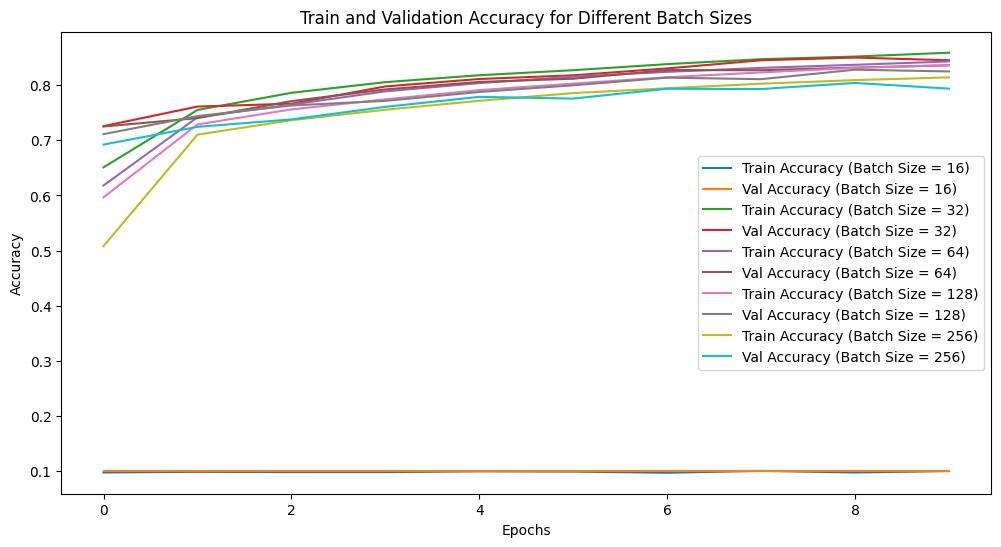

Temps d'entraînement moyen pour la taille de lot 16: 4.14 secondes
Temps d'entraînement moyen pour la taille de lot 32: 2.11 secondes
Temps d'entraînement moyen pour la taille de lot 64: 1.32 secondes
Temps d'entraînement moyen pour la taille de lot 128: 0.80 secondes
Temps d'entraînement moyen pour la taille de lot 256: 0.35 secondes


In [23]:
plt.figure(figsize=(12, 6))
for batch_size, result in results.items():
    plt.plot(result['train_accuracy'], label=f'Train Accuracy (Batch Size = {batch_size})')
    plt.plot(result['val_accuracy'], label=f'Val Accuracy (Batch Size = {batch_size})')

plt.title("Train and Validation Accuracy for Different Batch Sizes")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

for batch_size, result in results.items():
    print(f"Temps d'entraînement moyen pour la taille de lot {batch_size}: {result['training_time']:.2f} secondes")

#### 5. **Analyser les Résultats**
   - Comparez les éléments suivants :
     - **Temps d'entraînement** : Les tailles de lots plus grandes peuvent conduire à un entraînement plus rapide, mais elles pourraient aussi entraîner des rendements décroissants en termes de performance du modèle.
     - **Perte et précision** : Observez comment la taille du lot affecte la convergence de la fonction de perte et la précision sur les ensembles de données d'entraînement et de validation.
     - **Surapprentissage** : Vérifiez si des tailles de lots plus petites mènent à une meilleure généralisation (perte de validation plus faible) ou si des tailles de lots plus grandes entraînent un surapprentissage.

#### 6. **Tracer les Résultats**
   - Tracez des graphiques comparant la perte d'entraînement, la perte de validation et la précision pour différentes tailles de lots.
   - Tracez le temps d'entraînement pour différentes tailles de lots.

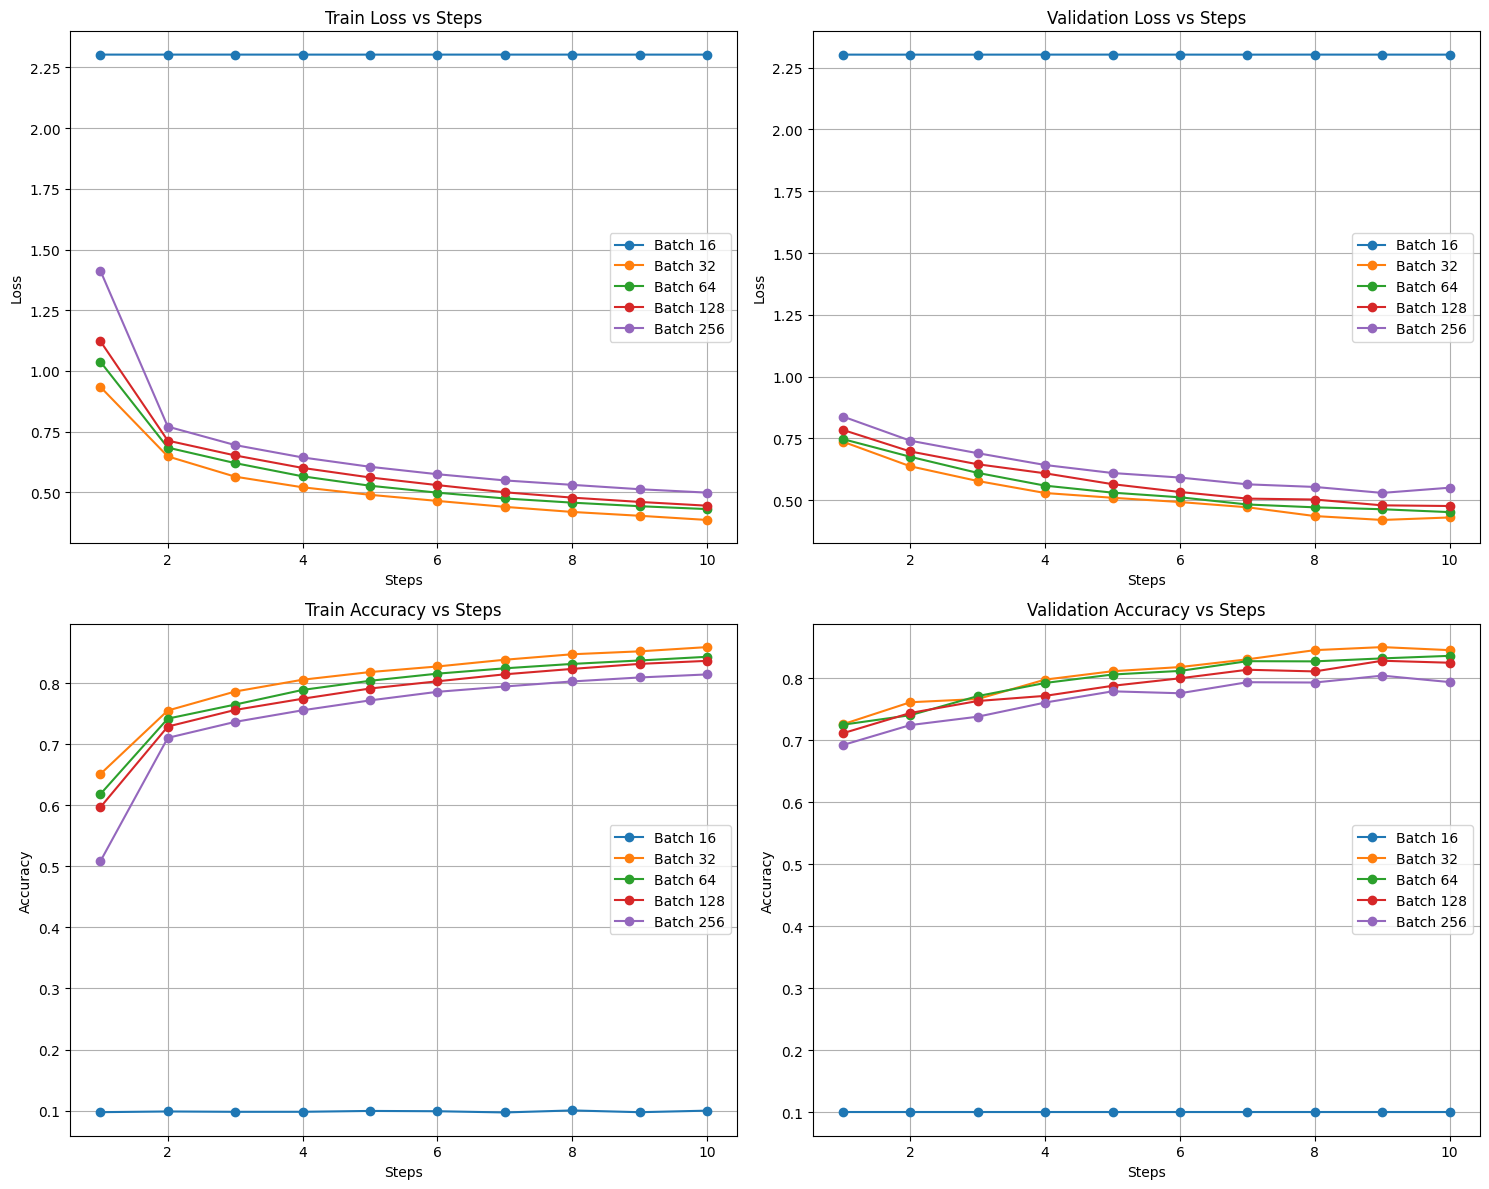

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for batch_size, metrics in results.items():
    steps = list(range(1, len(metrics['train_loss']) + 1))  
    axs[0, 0].plot(steps, metrics['train_loss'], label=f'Batch {batch_size}', marker='o')
    axs[0, 1].plot(steps, metrics['val_loss'], label=f'Batch {batch_size}', marker='o')
    axs[1, 0].plot(steps, metrics['train_accuracy'], label=f'Batch {batch_size}', marker='o')
    axs[1, 1].plot(steps, metrics['val_accuracy'], label=f'Batch {batch_size}', marker='o')

titles = [
    'Train Loss vs Steps',
    'Validation Loss vs Steps',
    'Train Accuracy vs Steps',
    'Validation Accuracy vs Steps'
]

y_labels = ['Loss', 'Loss', 'Accuracy', 'Accuracy']
for ax, title, ylabel in zip(axs.flat, titles, y_labels):
    ax.set_title(title)
    ax.set_xlabel('Steps')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

On peut donc maintenant effectuer certaines analyses.
- ### Petites tailles de lots (16)
  - ***Avantages***: Convergence rapide, et meilleure précision sur les données d'entrainement
  - ***Inconvénients***: Surapprentissage (hausse de `validation_loss` à 0.3459) et le temps d'entrainement est plus long

- ### Grandes tailles de lots (256)
  - ***Avantages***: Temps d'entrainement plus court et une bonne stabiliité
  - ***Inconvénients***: Convergence lente, et moins bonne précision sur les données d'entrainement (0.9241)

- ### Tailles de lots moyennes (32,64)
  - Meilleur équilibre entre temps d'entrainement, précision (0.915) et stabilité

Text(0.5, 1.0, 'Training Time for Different Batch Sizes')

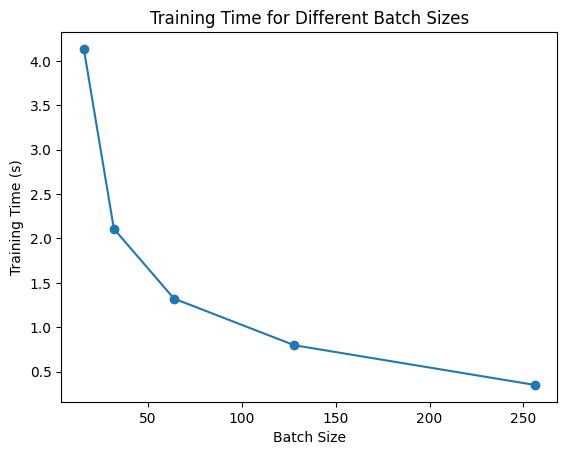

In [25]:
plt.plot(results.keys(), [result['training_time'] for result in results.values()], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Training Time (s)")
plt.title("Training Time for Different Batch Sizes")

### Exercice 3.4 : Classification des Émotions avec le Jeu de Données CREMA-D

**Objectif** : Créer un modèle pour classifier les émotions à partir de clips audio de discours humain. Cet exercice se concentre sur l'identification des émotions telles que la colère, la joie, la tristesse et les tons neutres, en utilisant un prétraitement audio de base et un réseau neuronal convolutionnel.

**Jeu de données** : **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset) contient des clips audio d'acteurs exprimant six émotions : colère, dégoût, peur, joie, neutre et tristesse. Bien qu'il ne soit pas directement disponible dans `tensorflow_datasets`, il est suffisamment petit pour être prétraité et chargé efficacement dans TensorFlow.

---

### Étapes :

#### 1. **Chargement et Prétraitement des Données**
   - **Charger le Jeu de Données** :
     - Téléchargez le jeu de données CREMA-D depuis sa [source officielle](https://github.com/CheyneyComputerScience/CREMA-D).
     - Organisez les fichiers audio et les étiquettes d'émotions correspondantes.
   - **Traitement Audio** :
     - Convertissez les formes d'onde audio en spectrogrammes ou en mel-spectrogrammes pour chaque clip audio.
     - Normalisez les spectrogrammes et ajustez-les pour qu'ils aient une longueur constante, par exemple, 2 secondes.

#### 2. **Construire un Modèle Simple de Classification des Émotions**
   - **Couches Convolutionnelles** :
     - Commencez par une couche `Conv2D` pour apprendre les motifs spatiaux dans le spectrogramme.
     - Ajoutez des couches `Conv2D` supplémentaires et des couches `MaxPooling2D` pour capturer des caractéristiques de niveau supérieur.
   - **Couches Flatten et Dense** :
     - Aplatissez la sortie finale et faites-la passer à travers une ou deux couches `Dense` pour la classification.
     - Utilisez une activation softmax dans la couche `Dense` finale avec six unités de sortie, une pour chaque classe d'émotion.
   - **Compiler et Entraîner** :
     - Utilisez l'entropie croisée catégorielle comme fonction de perte et un optimiseur comme Adam.
     - Entraînez le modèle sur l'ensemble d'entraînement, en utilisant un ensemble de validation pour ajuster les performances.

#### 3. **Évaluation du Modèle**
   - **Précision** :
     - Évaluez la précision du modèle sur l'ensemble de test.
   - **Matrice de Confusion** :
     - Générez une matrice de confusion pour analyser quelles émotions sont bien classées et lesquelles sont fréquemment mal classées.

#### 1. **Chargement et Prétraitement des Données**
   - **Charger le Jeu de Données** :
     - Téléchargez le jeu de données CREMA-D depuis sa [source officielle](https://github.com/CheyneyComputerScience/CREMA-D).
     - Organisez les fichiers audio et les étiquettes d'émotions correspondantes.
   - **Traitement Audio** :
     - Convertissez les formes d'onde audio en spectrogrammes ou en mel-spectrogrammes pour chaque clip audio.
     - Normalisez les spectrogrammes et ajustez-les pour qu'ils aient une longueur constante, par exemple, 2 secondes.

In [26]:
# Define path to CREMA-D dataset (update path accordingly)
DATA_PATH = 'CREMA-D/AudioWAV'
LABELS = {'ANG': 0, 'DIS': 1, 'FEA': 2, 'HAP': 3, 'NEU': 4, 'SAD': 5}

In [27]:
def preprocess_audio(file_path, max_length=2.5, sr=16000):
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the desired length in samples
    target_length = int(sr * max_length)
    # Adjust the audio to the desired length
    audio = librosa.util.fix_length(audio, size=target_length)
    # Convert audio to a mel-spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db


In [28]:
# Load and preprocess data
def load_data(data_path, labels):
    data, targets = [], []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(data_path, file_name)
            label_str = file_name.split('_')[2]  # e.g., "ANG", "DIS"
            if label_str in labels:
                spectrogram = preprocess_audio(file_path)
                data.append(spectrogram)
                targets.append(labels[label_str])
    return np.array(data), np.array(targets)

In [29]:
# Load data
X, y = load_data(DATA_PATH, LABELS)
X = X[..., np.newaxis]  # Add channel dimension for Conv2D

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train : {X_train.shape}, Test : {X_test.shape}")

Train : (5953, 128, 79, 1), Test : (1489, 128, 79, 1)


2. **Construire un Modèle Simple de Classification des Émotions**
   - **Couches Convolutionnelles** :
     - Commencez par une couche `Conv2D` pour apprendre les motifs spatiaux dans le spectrogramme.
     - Ajoutez des couches `Conv2D` supplémentaires et des couches `MaxPooling2D` pour capturer des caractéristiques de niveau supérieur.
   - **Couches Flatten et Dense** :
     - Aplatissez la sortie finale et faites-la passer à travers une ou deux couches `Dense` pour la classification.
     - Utilisez une activation softmax dans la couche `Dense` finale avec six unités de sortie, une pour chaque classe d'émotion.
   - **Compiler et Entraîner** :
     - Utilisez l'entropie croisée catégorielle comme fonction de perte et un optimiseur comme Adam.
     - Entraînez le modèle sur l'ensemble d'entraînement, en utilisant un ensemble de validation pour ajuster les performances.

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/rodologie/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 77, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 14336)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │     1,835,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928,582 (7.36 MB)

 Trainable params: 1,928,582 (7.36 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train,
                    epochs=10,  
                    batch_size=32,
                    validation_data=(X_test, y_test))

result = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
    }

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2449 - loss: 4.2759 - val_accuracy: 0.2888 - val_loss: 1.6721
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1779 - loss: 1.7892 - val_accuracy: 0.1760 - val_loss: 1.7905
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1692 - loss: 1.7903 - val_accuracy: 0.1605 - val_loss: 1.7909
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1775 - loss: 1.7903 - val_accuracy: 0.1605 - val_loss: 1.7912
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1715 - loss: 1.7891 - val_accuracy: 0.1605 - val_loss: 1.7915
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1712 - loss: 1.7886 - val_accuracy: 0.1605 - val_loss: 1.7915
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1624 - loss: 1.7892 - val_accuracy: 0.1605 - val_loss: 1.7913
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1730 - loss: 1.7897 - val_accuracy: 0

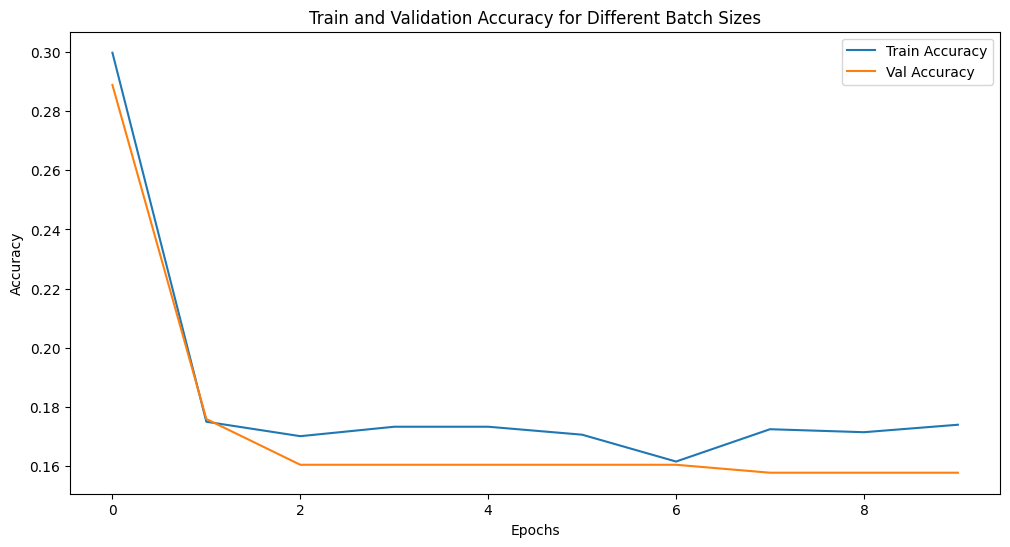

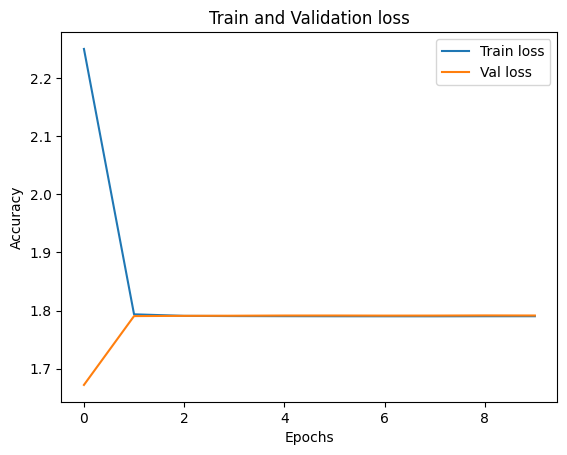

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(result['train_accuracy'], label=f'Train Accuracy')
plt.plot(result['val_accuracy'], label=f'Val Accuracy')

plt.title("Train and Validation Accuracy for Different Batch Sizes")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result['train_loss'], label=f'Train loss')
plt.plot(result['val_loss'], label=f'Val loss')

plt.title("Train and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Améliorations du model

In [33]:
# Ajout de couches

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 126, 77, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 77, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 63, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 61, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 36, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 8, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 8, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 28672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │    14,680,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,057,158 (57.44 MB)

 Trainable params: 15,055,238 (57.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [34]:
history = model.fit(X_train, y_train,
                    epochs=10,   
                    batch_size=32,
                    validation_data=(X_test, y_test))

result = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
    }

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.3533 - loss: 2.0603 - val_accuracy: 0.3862 - val_loss: 1.6797
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4661 - loss: 1.4336 - val_accuracy: 0.3083 - val_loss: 2.0544
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4999 - loss: 1.2972 - val_accuracy: 0.2733 - val_loss: 2.4644
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5243 - loss: 1.2214 - val_accuracy: 0.3116 - val_loss: 2.3779
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5752 - loss: 1.1136 - val_accuracy: 0.4809 - val_loss: 1.4092
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6129 - loss: 1.0215 - val_accuracy: 0.3835 - val_loss: 1.8774
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6349 - loss: 0.9742 - val_accuracy: 0.4621 - val_loss: 1.6586
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6482 - loss: 0.9290 - val_accu

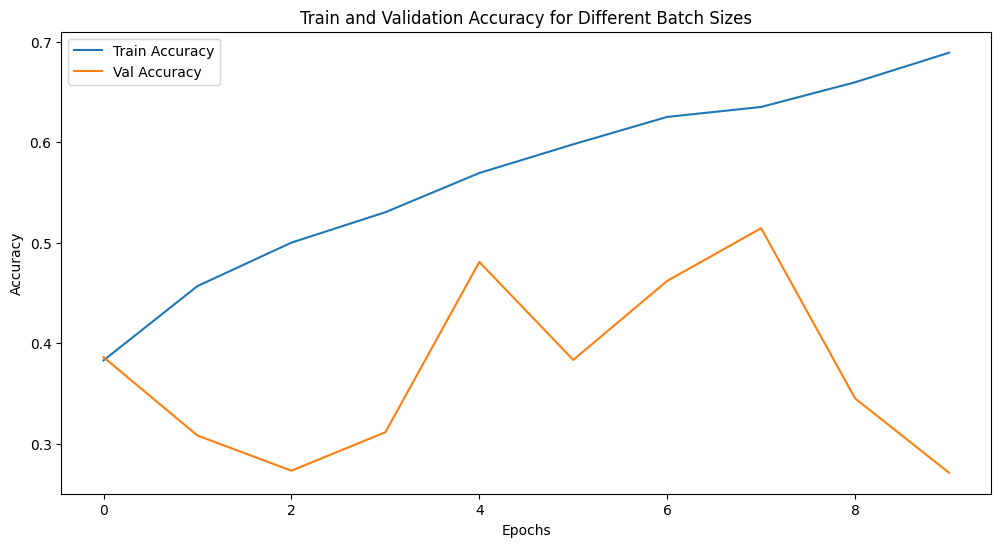

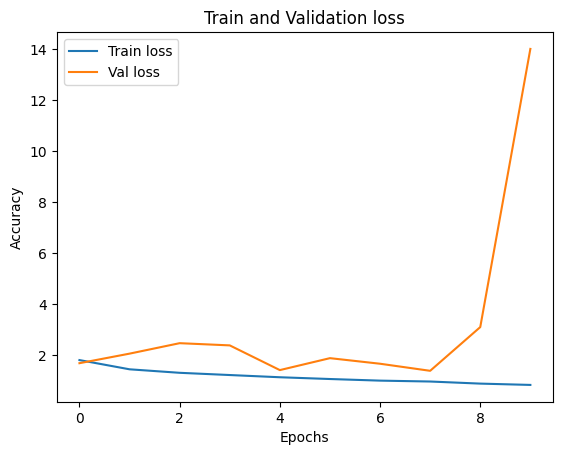

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(result['train_accuracy'], label=f'Train Accuracy')
plt.plot(result['val_accuracy'], label=f'Val Accuracy')

plt.title("Train and Validation Accuracy for Different Batch Sizes")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result['train_loss'], label=f'Train loss')
plt.plot(result['val_loss'], label=f'Val loss')

plt.title("Train and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Entraîner le modèle avec les callbacks
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7367 - loss: 0.7397 - val_accuracy: 0.5299 - val_loss: 1.6755
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7592 - loss: 0.6412 - val_accuracy: 0.4392 - val_loss: 3.4271
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7976 - loss: 0.5566 - val_accuracy: 0.4480 - val_loss: 2.2682
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4853 - val_accuracy: 0.3721 - val_loss: 5.0035
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8523 - loss: 0.4242 - val_accuracy: 0.4305 - val_loss: 2.4537
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8691 - loss: 0.3704 - val_accuracy: 0.4043 - val_loss: 4.4625
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8772 - loss: 0.3387 - val_accuracy: 0.5393 - val_loss: 1.5708
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8871 - loss: 0.3194 - val_accur

In [37]:
# Charger le meilleur modèle
model.load_weights('best_model.keras')

# Évaluer sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5403 - loss: 1.5616
Test accuracy: 0.5419744849205017


In [38]:
# Modèle amélioré avec des ajustements supplémentaires
model = Sequential()

# Première couche convolutionnelle avec des filtres plus petits (3x3)
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Deuxième couche convolutionnelle
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Troisième couche convolutionnelle
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Aplatir les sorties
model.add(Flatten())

# Première couche dense avec plus de neurones
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Couche dense finale pour la classification
model.add(Dense(6, activation='softmax'))  # 6 émotions

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 126, 77, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 77, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 63, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 63, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 36, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 30, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 8, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 8, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 28672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1024)           │    29,361,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,742,854 (113.46 MB)

 Trainable params: 29,739,910 (113.45 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [39]:
def augment_audio(audio, sr=16000):
    # Variation de la vitesse (time-stretching)
    audio_stretch = librosa.effects.time_stretch(audio, rate=np.random.uniform(0.8, 1.2))
    
    # Ajout de bruit de fond
    noise = np.random.randn(len(audio_stretch)) * 0.005
    audio_noisy = audio_stretch + noise
    
    # Limiter les valeurs entre -1 et 1
    audio_noisy = np.clip(audio_noisy, -1, 1)
    
    return audio_noisy

In [40]:
# Utiliser ReduceLROnPlateau pour réduire le taux d'apprentissage si la performance se stabilise
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6)

# Entraîner le modèle avec les callbacks
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint, lr_scheduler])

Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.3518 - loss: 2.1917 - val_accuracy: 0.3566 - val_loss: 1.7248 - learning_rate: 0.0010
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4490 - loss: 1.5185 - val_accuracy: 0.2626 - val_loss: 3.0042 - learning_rate: 0.0010
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4944 - loss: 1.3333 - val_accuracy: 0.2062 - val_loss: 3.1852 - learning_rate: 0.0010
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5427 - loss: 1.2086 - val_accuracy: 0.1901 - val_loss: 2.7938 - learning_rate: 0.0010
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5485 - loss: 1.1594 - val_accuracy: 0.3506 - val_loss: 1.8992 - learning_rate: 0.0010
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5953 - loss: 1.0841 - val_accuracy: 0.2827 - val_loss: 4.4605 - learning_rate: 0.0010
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6257 - loss: 0.

In [41]:
history = model.fit(X_train, y_train,
                    epochs=50,  # Augmenter le nombre d'époques
                    batch_size=16,  # Réduire la taille du batch
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint, lr_scheduler])

Epoch 1/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3649 - loss: 1.9319 - val_accuracy: 0.2498 - val_loss: 2.3297 - learning_rate: 0.0010
Epoch 2/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3811 - loss: 1.7172 - val_accuracy: 0.3942 - val_loss: 1.6305 - learning_rate: 0.0010
Epoch 3/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4222 - loss: 1.5392 - val_accuracy: 0.2639 - val_loss: 2.1534 - learning_rate: 0.0010
Epoch 4/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4269 - loss: 1.4820 - val_accuracy: 0.3015 - val_loss: 2.4088 - learning_rate: 0.0010
Epoch 5/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4408 - loss: 1.4568 - val_accuracy: 0.4285 - val_loss: 1.5807 - learning_rate: 0.0010
Epoch 6/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4789 - loss: 1.3715 - val_accuracy: 0.4352 - val_loss: 1.4728 - learning_rate: 0.0010
Epoch 7/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4719 - loss: 1.3727 -

#### 3. **Évaluation du Modèle**
   - **Précision** :
     - Évaluez la précision du modèle sur l'ensemble de test.
   - **Matrice de Confusion** :
     - Générez une matrice de confusion pour analyser quelles émotions sont bien classées et lesquelles sont fréquemment mal classées.

Le meiilleur modèle obtenu es le suivant:

In [42]:
# Charger le meilleur modèle
model.load_weights('best_model.keras')

# Évaluer sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 1.9024
Test accuracy: 0.5755540728569031


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


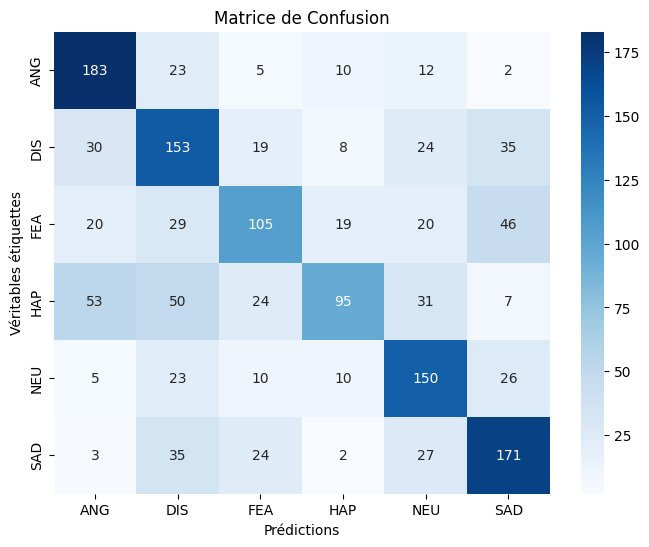

In [43]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(LABELS.keys()), yticklabels=list(LABELS.keys()))
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables étiquettes")
plt.show()

J'ai utilisé l'IA pour ce TP dans la recherche du meilleur model qui puisse 'fitter' avec le dataset